# Datenbeschreibung
NUTS1 | NUTS1-Region (Gruppe von Bundesländern) NUTS2 | NUTS2-Region (Bundesland) NUTS3 | NUTS3-Region (Gruppe von Bezirken) DISTRICT_CODE | Gemeindebezirkskennzahl SUB_DISTRICT_CODE | Zählbezirkskennzahl SEX | Geschlecht (1 Mann, 2 Frau) MIG_BACKGROUND | Migrationshintergrund MIG_NET_TOTAL | Gesamtwanderungssaldo MIG_NET_EXT | Außenwanderungssaldo IMM_EXT | Zuzug aus dem Ausland EMI_EXT | Wegzug ins Ausland MIG_NET_INT | Binnenwanderungssaldo IMM_INT | Zuzug aus anderem Bundesland EMI_INT | Wegzug ins andere Bundesland IMM_SDC | Zuzug aus einem anderen Zählbezirk EMI_SDC | Wegzug in einen anderen Zählbezirk MIG_SDC_INT | Umzug innerhalb eines Zählbezirkes REF_YEAR | Referenzjahr 

### Initialisierung

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,HTML
import ipywidgets as widgets

In [2]:
df=pd.read_csv('vie_215.csv',sep=';',skiprows=1)

In [3]:
df.head()

,NUTS1,NUTS2,NUTS3,DISTRICT_CODE,SUB_DISTRICT_CODE,SEX,NATIONALITY,MIG_NET_TOTAL,MIG_NET_EXT,IMM_EXT,EMI_EXT,MIG_NET_INT,IMM_INT,EMI_INT,IMM_SDC,EMI_SDC,MIG_SDC_INT,REF_YEAR
0,AT1,AT13,AT130,90100,90101,2,AUT,2,-3,4,7,5,23,18,52,63,5,2007
1,AT1,AT13,AT130,90100,90101,2,ROU,3,3,5,2,0,0,0,5,2,0,2007
2,AT1,AT13,AT130,90100,90101,2,DEU,4,5,8,3,-1,2,3,8,7,1,2007
3,AT1,AT13,AT130,90100,90101,2,POL,4,4,6,2,0,0,0,0,3,0,2007
4,AT1,AT13,AT130,90100,90101,2,HUN,1,1,1,0,0,0,0,0,1,0,2007



### Zusätzliche Variable

In [4]:
#Bezirkscode
df['DC']=df['DISTRICT_CODE'].apply(lambda x: str(x)[1:3])

#Geschlecht
df['sex']=df.SEX.apply(lambda x:'m' if x ==1 else 'f')

### Test-Gruppierungen

In [5]:
df.groupby('REF_YEAR').groups.keys()

dict_keys([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [6]:
nat=[name for name,groups in df.groupby('NATIONALITY')]
nat

['AFG',
 'AUT',
 'BGR',
 'BIH',
 'DEU',
 'HUN',
 'IRN',
 'IRQ',
 'ITA',
 'OTHER',
 'POL',
 'REST-EU',
 'ROU',
 'RUS',
 'SRB',
 'SVK',
 'SYR']

In [7]:
yr=df.groupby('REF_YEAR').groups.keys()
gr=df.groupby(['REF_YEAR','NATIONALITY'])

print('AUT-Umzug im Bezirk:')
for y in yr:
    print('{}: {}'.format(y,gr.get_group((y,'AUT'))['MIG_SDC_INT'].sum()))

AUT-Umzug im Bezirk:
2007: 8154
2008: 8213
2009: 8015
2010: 7883
2011: 7824
2012: 7819
2013: 6989
2014: 7004
2015: 7090
2016: 7144
2017: 6874


### Alle Migrationsströme nach Nationen und Jahr

In [8]:
df.groupby(['NATIONALITY','REF_YEAR']) \
    .MIG_NET_TOTAL.sum().unstack() \
    .style.highlight_max(color='yellow',axis=1)

REF_YEAR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
NATIONALITY,,,,,,,,,,,
AFG,260,367,570,525,959,844,1062,1732,4864,1983,2521
AUT,-4423,-5695,-2007,-1072,-1994,0,-2319,-3006,-2517,-4692,-5498
BGR,823,950,653,832,706,973,974,2066,1387,1191,1059
BIH,353,278,165,178,410,592,795,896,943,437,296
DEU,2341,2243,1861,2094,1416,2258,1831,1651,2209,1448,1487
HUN,673,655,543,644,925,1809,2753,2228,2214,1573,1186
IRN,404,12,63,31,17,959,727,247,1633,784,241
IRQ,77,240,161,96,187,132,179,222,2372,1115,630
ITA,233,187,218,321,259,623,739,709,830,690,621


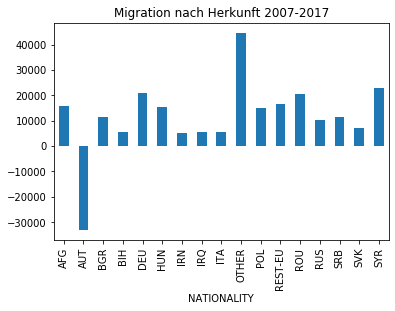

In [9]:
df.groupby('NATIONALITY').sum()['MIG_NET_TOTAL'] \
    .plot(kind='bar',title='Migration nach Herkunft 2007-2017');

### Netto-Migration 2007 - 2017

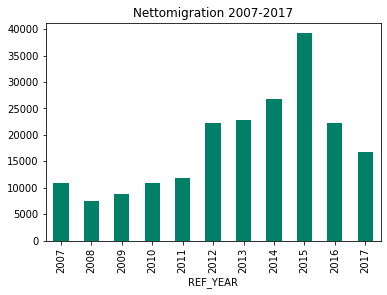

In [10]:
yr=df.groupby('REF_YEAR') ['MIG_NET_TOTAL']
yr.sum().plot(kind='bar',title="Nettomigration 2007-2017",colormap='summer');

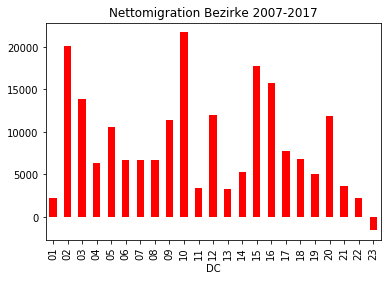

In [11]:
bez=df.groupby('DC') ['MIG_NET_TOTAL']
bez.sum().plot(kind='bar',title="Nettomigration Bezirke 2007-2017",colormap= 'autumn');

## Bezirksentwicklung
### Absolute Werte

In [12]:
def f(x):
        bezirk=df.loc[df.DC==x]
        with pd.option_context('display.float_format', '{:.3f}'.format):
            display(pd.DataFrame \
                    (pd.crosstab(bezirk.NATIONALITY,bezirk.REF_YEAR, \
                    aggfunc=sum,values=bezirk.MIG_NET_TOTAL,margins=False,normalize=False)) \
                    .style.highlight_max(color='yellow',axis=1)
                   )
interact(f,x=widgets.SelectionSlider(
    options=df.groupby('DC').groups.keys(),
    value='01',
    description='Bezirk'
));

interactive(children=(SelectionSlider(description='Bezirk', options=('01', '02', '03', '04', '05', '06', '07',…

## Bezirksentwicklung
### Relative Werte

In [13]:
def f(x):
    bezirk=df.loc[df.DC==x]
    display(pd.DataFrame \
             (pd.crosstab(bezirk.NATIONALITY,bezirk.REF_YEAR, \
             aggfunc=sum,values=bezirk.MIG_NET_TOTAL,margins=False,normalize=True)) \
             .style.highlight_max(color='yellow',axis=1).format("{:.3f}")
               )
interact(f,x=widgets.SelectionSlider(
    options=df.groupby('DC').groups.keys(),
    value='01',
    description='Bezirk'
));

interactive(children=(SelectionSlider(description='Bezirk', options=('01', '02', '03', '04', '05', '06', '07',…

## Jahresentwicklung nach Geschlecht

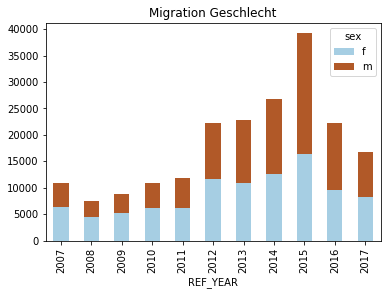

In [14]:
df.groupby(['REF_YEAR','sex']).sum() ['MIG_NET_TOTAL'] \
.unstack().plot(kind='bar',stacked=True,title='Migration Geschlecht',colormap= 'Paired');

## Migrationspfade AUT

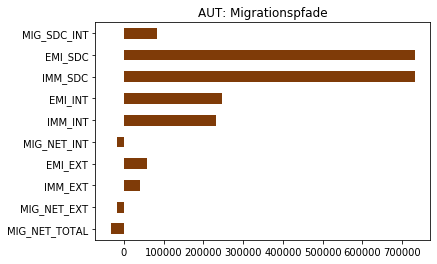

In [15]:
aut=df.loc[df.NATIONALITY=='AUT','MIG_NET_TOTAL':'MIG_SDC_INT']
aut.sum().plot(kind='barh',title='AUT: Migrationspfade',colormap='PuOr');

## Migrationspfade nach Nationen

In [16]:
     
def f(x):
    #bezirk=df.loc[df.NATIONALITY==x]
    bezirk=df.loc[df.NATIONALITY==x,'MIG_NET_TOTAL':'MIG_SDC_INT'] \
        .sum().plot(kind='barh',title='Migrationspfade 2007-2017',grid=True);
     
interact(f,x=widgets.SelectionSlider(
   options=df.groupby('NATIONALITY').groups.keys(),
    value='AUT',
    description='Nationalität'
));

interactive(children=(SelectionSlider(description='Nationalität', index=1, options=('AFG', 'AUT', 'BGR', 'BIH'…

In [17]:
def f(x):
        bezirk=df.loc[df.DC==x]
        with pd.option_context('display.float_format', '{:.3f}'.format):
            display(pd.DataFrame \
                    (pd.crosstab(bezirk.NATIONALITY,bezirk.REF_YEAR, \
                    aggfunc=sum,values=bezirk.MIG_NET_TOTAL,margins=False,normalize=False)) \
                    .style.highlight_max(color='yellow',axis=1)
                   )
interact(f,x=widgets.SelectionSlider(
    options=df.groupby('DC').groups.keys(),
    value='01',
    description='Bezirk'
));

interactive(children=(SelectionSlider(description='Bezirk', options=('01', '02', '03', '04', '05', '06', '07',…

In [18]:
def myhighlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def f(x):
    bezirk=df.loc[df.DC==x]
    display(pd.DataFrame \
            (pd.crosstab(bezirk.NATIONALITY,bezirk.REF_YEAR, \
            aggfunc=sum,values=bezirk.MIG_NET_TOTAL,margins=True,normalize=False)) \
            .style.apply(myhighlight_max,axis=1)
           )
interact(f,x=widgets.SelectionSlider(
    options=df.groupby('DC').groups.keys(),
    value='01',
    description='Bezirk'
));

interactive(children=(SelectionSlider(description='Bezirk', options=('01', '02', '03', '04', '05', '06', '07',…